# Customer churn Prediction
Develop a model to predict customer churn for a subscription-
based service or business. Use historical customer data, including

features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient

Boosting to predict churn.

##About Dataset

###Context
It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.

###Content
Various Bank detail is given like CustomerID , surname, Credit score and many more.

###Acknowledgements
This dataset is originated from a U.S. bank .

###Inspiration
Lets work together on this dataset and learn basic level of prediction using different libraries.

In [1]:
# importing nessasary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, precision_score

## Importing and undersatnding data

In [2]:
data = pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
data.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<Axes: xlabel='Exited', ylabel='count'>

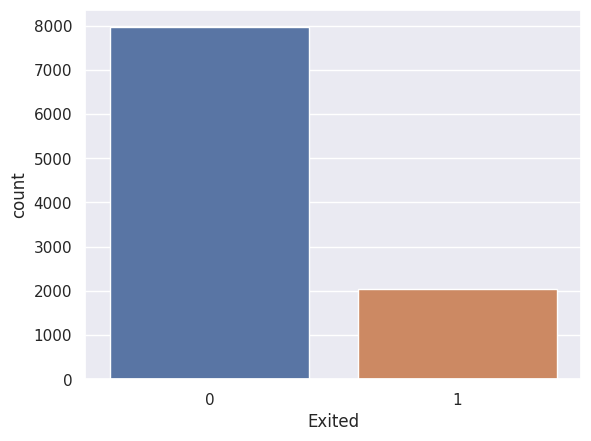

In [6]:
sns.set_theme()
sns.countplot(data = data, x = data.Exited)

In [7]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited'>

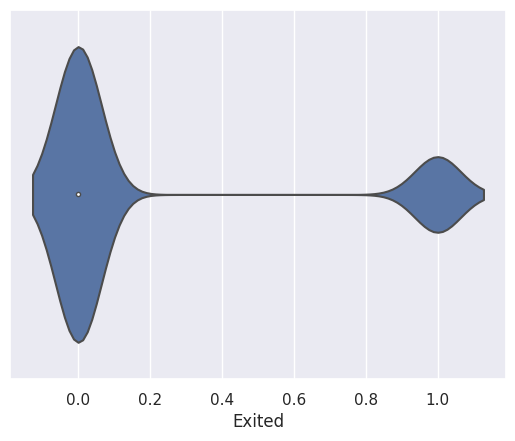

In [8]:
sns.violinplot(data = data, x = data.Exited)

In [9]:
#sns.pairplot(data = data, hue = "Exited")

In [10]:
len(data.columns)

14

In [11]:
column = data.columns

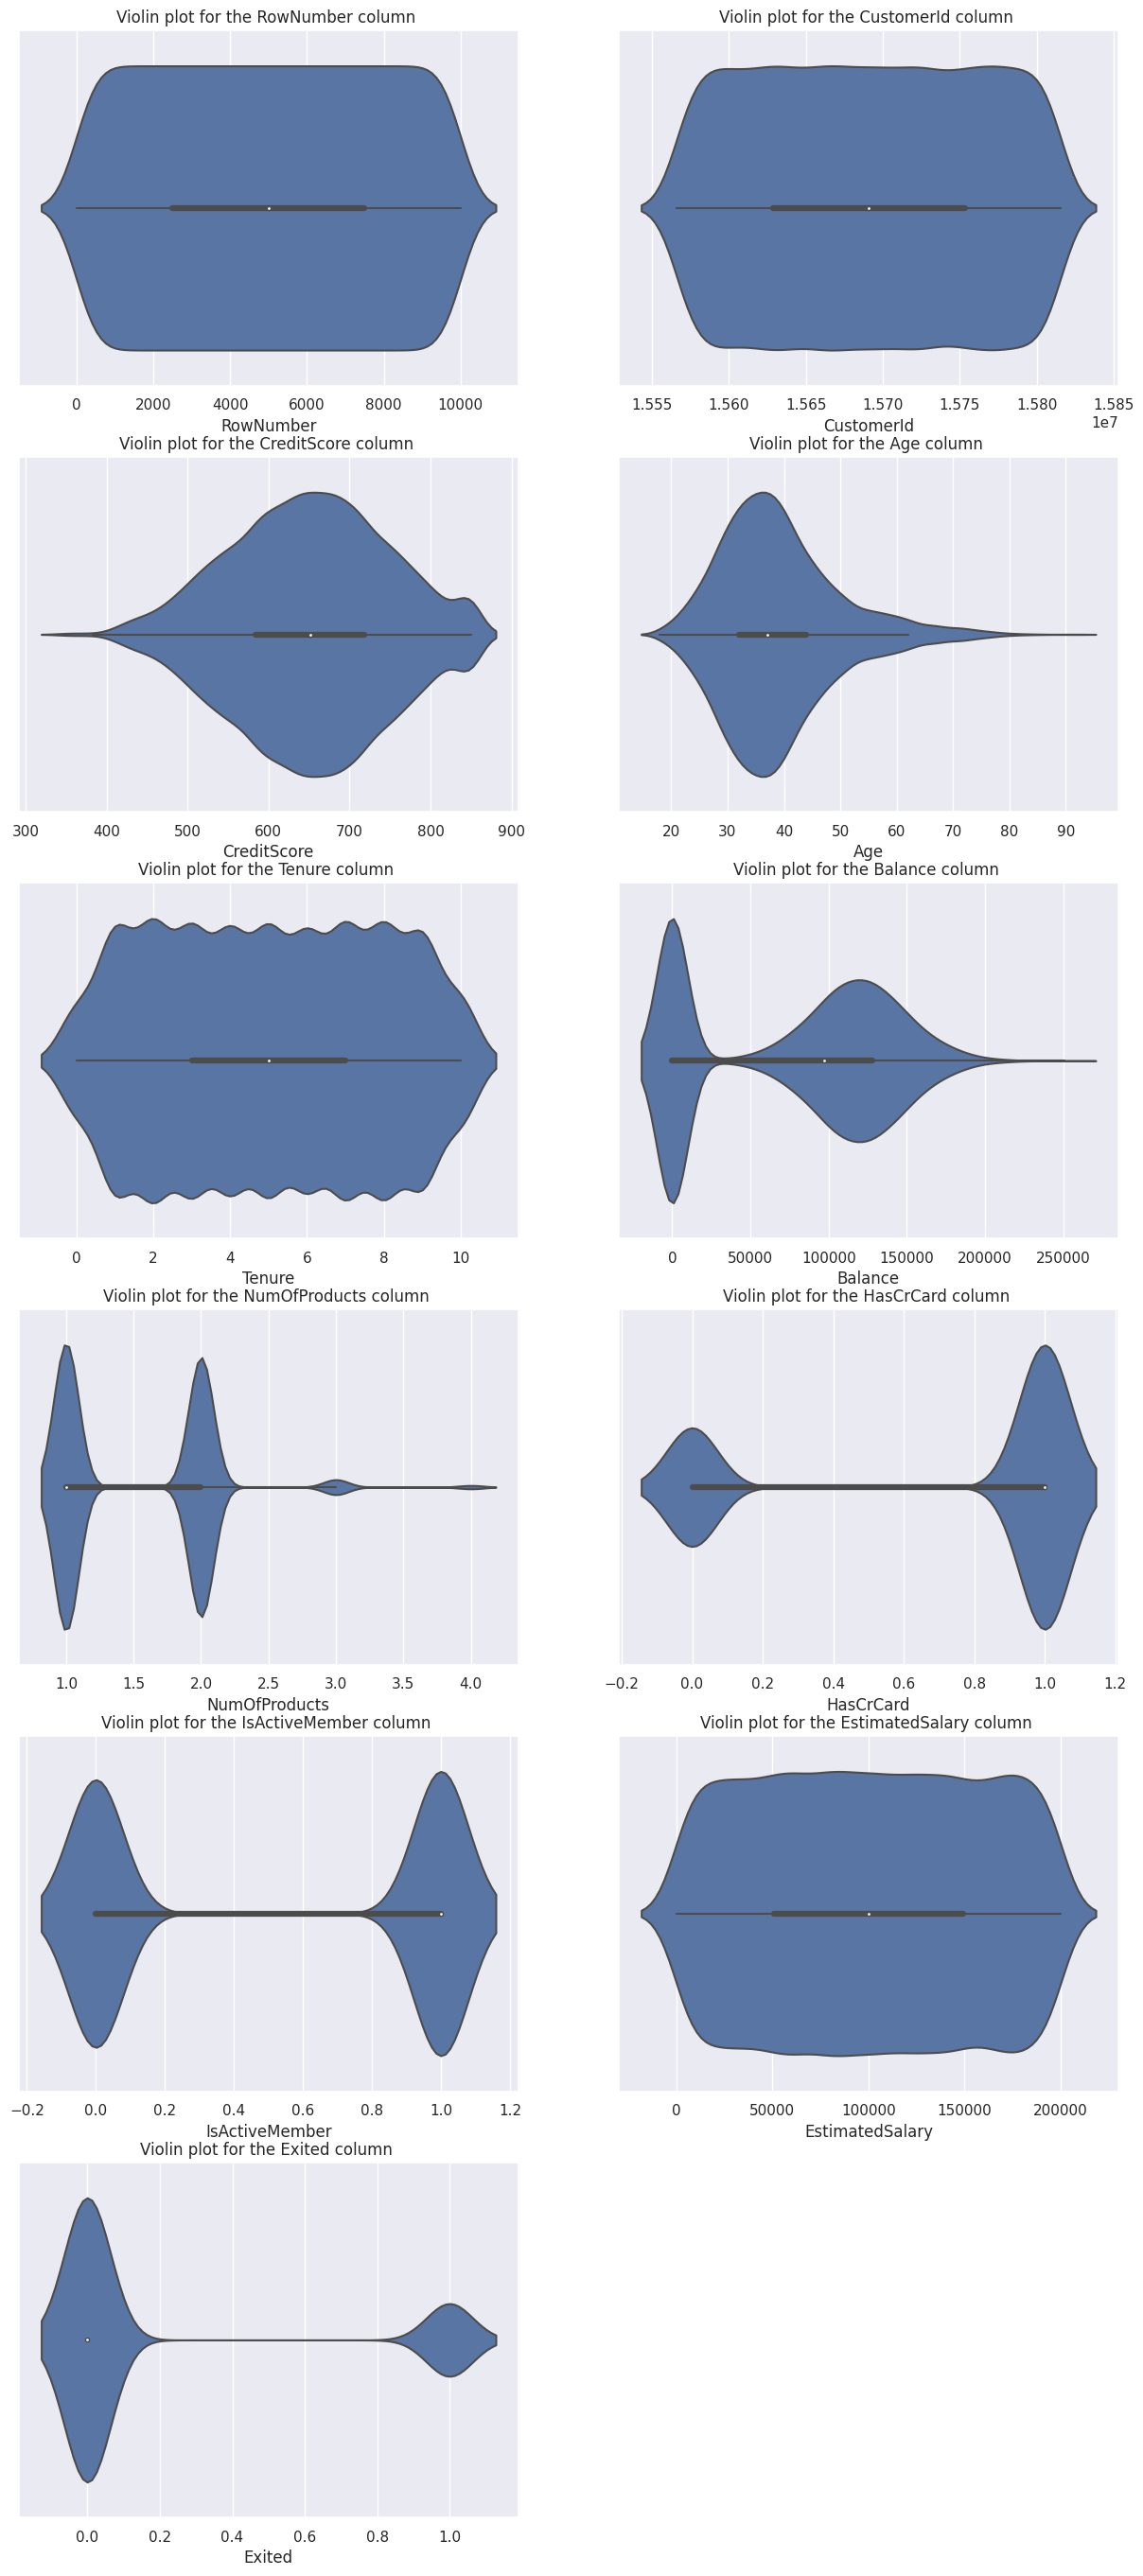

In [12]:
j = 1
plt.figure(figsize = (15, 40))
for i in range(0, 14):
  plt.subplot(7, 2, j)
  if data.iloc[:, i].dtype != 'object':
    sns.violinplot(data, x = data.iloc[:, i], figsize = (5,5))
    plt.title(f"Violin plot for the {column[i]} column ")
    j = j+1

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
x = data.drop(labels = "Exited", axis = 1)
y = data.Exited

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size = 0.2)

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 7079 to 1085
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8000 non-null   int64  
 1   CustomerId       8000 non-null   int64  
 2   Surname          8000 non-null   object 
 3   CreditScore      8000 non-null   int64  
 4   Geography        8000 non-null   object 
 5   Gender           8000 non-null   object 
 6   Age              8000 non-null   int64  
 7   Tenure           8000 non-null   int64  
 8   Balance          8000 non-null   float64
 9   NumOfProducts    8000 non-null   int64  
 10  HasCrCard        8000 non-null   int64  
 11  IsActiveMember   8000 non-null   int64  
 12  EstimatedSalary  8000 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 875.0+ KB


In [17]:
model_0 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 3, 6, 7, 8, 9, 10, 11, 12]),
        (OneHotEncoder(handle_unknown = 'ignore'), [2, 4, 5]),
        remainder = "passthrough"
    )),
    ("model", KNeighborsClassifier())
])
model_0.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 3, 6, 7, 8, 9, 10, 11,
                                                   12]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2, 4, 5])])),
                ('model', KNeighborsClassifier())])

In [18]:
KNN = model_0.score(X_test, y_test)

In [19]:
KNN

0.805

In [20]:
model_1 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 3, 6, 7, 8, 9, 10, 11, 12]),
        (OneHotEncoder(handle_unknown = 'ignore'), [2, 4, 5]),
        remainder = "passthrough"
    )),
    ("model", SGDClassifier())
])
model_1.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 3, 6, 7, 8, 9, 10, 11,
                                                   12]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2, 4, 5])])),
                ('model', SGDClassifier())])

In [21]:
SGDC = model_1.score(X_test, y_test)
SGDC

0.792

In [22]:
model_2 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 3, 6, 7, 8, 9, 10, 11, 12]),
        (OneHotEncoder(handle_unknown = 'ignore'), [2, 4, 5]),
        remainder = "passthrough"
    )),
    ("model", SVC())
])
model_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 3, 6, 7, 8, 9, 10, 11,
                                                   12]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2, 4, 5])])),
                ('model', SVC())])

In [23]:
SVM = model_2.score(X_test, y_test)
SVM

0.813

In [24]:
model_3 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 3, 6, 7, 8, 9, 10, 11, 12]),
        (OneHotEncoder(handle_unknown = 'ignore'), [2, 4, 5]),
        remainder = "passthrough"
    )),
    ("model", RandomForestClassifier())
])
model_3.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 3, 6, 7, 8, 9, 10, 11,
                                                   12]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2, 4, 5])])),
                ('model', RandomForestClassifier())])

In [25]:
RFC = model_3.score(X_test, y_test)
RFC

0.849

In [26]:
model_4 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 3, 6, 7, 8, 9, 10, 11, 12]),
        (OneHotEncoder(handle_unknown = 'ignore'), [2, 4, 5]),
        remainder = "passthrough"
    )),
    ("model", LogisticRegression())
])
model_4.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 3, 6, 7, 8, 9, 10, 11,
                                                   12]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2, 4, 5])])),
                ('model', LogisticRegression())])

In [27]:
LR = model_4.score(X_test, y_test)
LR

0.8025

In [28]:
model_5 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 3, 6, 7, 8, 9, 10, 11, 12]),
        (OneHotEncoder(handle_unknown = 'ignore'), [2, 4, 5]),
        remainder = "passthrough"
    )),
    ("model", GradientBoostingClassifier())
])
model_5.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 3, 6, 7, 8, 9, 10, 11,
                                                   12]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2, 4, 5])])),
                ('model', GradientBoostingClassifier())])

In [29]:
GBC = model_5.score(X_test, y_test)
GBC

0.8595

In [30]:
model_6 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 3, 6, 7, 8, 9, 10, 11, 12]),
        (OneHotEncoder(handle_unknown = 'ignore'), [2, 4, 5]),
        remainder = "passthrough"
    )),
    ("model", AdaBoostClassifier())
])
model_6.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 3, 6, 7, 8, 9, 10, 11,
                                                   12]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2, 4, 5])])),
                ('model', AdaBoostClassifier())])

In [31]:
ABC = model_6.score(X_test, y_test)
ABC

0.839

In [32]:
model_7 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 3, 6, 7, 8, 9, 10, 11, 12]),
        (OneHotEncoder(handle_unknown = 'ignore'), [2, 4, 5]),
        remainder = "passthrough"
    )),
    ("model", DecisionTreeClassifier())
])
model_7.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 3, 6, 7, 8, 9, 10, 11,
                                                   12]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2, 4, 5])])),
                ('model', DecisionTreeClassifier())])

In [33]:
DTC = model_7.score(X_test, y_test)
DTC

0.8115

In [34]:
model_8 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 3, 6, 7, 8, 9, 10, 11, 12]),
        (OneHotEncoder(handle_unknown = 'ignore'), [2, 4, 5]),
        remainder = "passthrough"
    )),
    ("model", BernoulliNB())
])
model_8.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 3, 6, 7, 8, 9, 10, 11,
                                                   12]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2, 4, 5])])),
                ('model', BernoulliNB())])

In [35]:
BNB = model_8.score(X_test, y_test)
BNB

0.792

In [36]:
model_9 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 3, 6, 7, 8, 9, 10, 11, 12]),
        (OneHotEncoder(handle_unknown = 'ignore'), [2, 4, 5]),
        remainder = "passthrough"
    )),
    ("model", XGBClassifier())
])
model_9.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 3, 6, 7, 8, 9, 10, 11,
                                                   12]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2, 4, 5])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               ea...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [37]:
XGB = model_9.score(X_test, y_test)
XGB

0.8435

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 7079 to 1085
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8000 non-null   int64  
 1   CustomerId       8000 non-null   int64  
 2   Surname          8000 non-null   object 
 3   CreditScore      8000 non-null   int64  
 4   Geography        8000 non-null   object 
 5   Gender           8000 non-null   object 
 6   Age              8000 non-null   int64  
 7   Tenure           8000 non-null   int64  
 8   Balance          8000 non-null   float64
 9   NumOfProducts    8000 non-null   int64  
 10  HasCrCard        8000 non-null   int64  
 11  IsActiveMember   8000 non-null   int64  
 12  EstimatedSalary  8000 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 875.0+ KB


In [39]:
X_train = X_train.drop(labels = {'Surname', 'Geography', 'Gender'}, axis = 1)
ct = make_column_transformer(
        (MinMaxScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
         remainder = "passthrough"
    )
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])])

In [40]:
X_train_processed = ct.transform(X_train)
X_test_processed = ct.transform(X_test)
#X_train_processed = tf.sparse.to_dense(X_train_processed)
#X_test_processed = tf.sparse.to_dense(X_test_processed)
# y_train = tf.sparse.to_dense(y_train)
# y_test = tf.sparse.to_dense(y_test)

In [41]:
X_train_processed, print(X_test_processed)

[[0.02250225 0.53340801 0.64       ... 1.         0.         0.99130117]
 [0.51255126 0.36160509 0.384      ... 0.         1.         0.70465929]
 [0.33123312 0.15996079 0.628      ... 1.         0.         0.67085542]
 ...
 [0.73927393 0.91767718 0.492      ... 1.         1.         0.69176186]
 [0.85728573 0.18212078 0.804      ... 1.         0.         0.86003143]
 [0.02540254 0.40060411 0.692      ... 0.         0.         0.88359383]]


(array([[0.7079708 , 0.55361965, 0.49      , ..., 1.        , 1.        ,
         0.28928413],
        [0.25942594, 0.88662759, 0.374     , ..., 1.        , 0.        ,
         0.08124806],
        [0.64046405, 0.71892141, 0.598     , ..., 1.        , 0.        ,
         0.42430187],
        ...,
        [0.87438744, 0.72146586, 0.2       , ..., 0.        , 1.        ,
         0.97735219],
        [0.14591459, 0.02431238, 0.934     , ..., 1.        , 0.        ,
         0.47969566],
        [0.10851085, 0.3233062 , 0.906     , ..., 1.        , 0.        ,
         0.98237007]]),
 None)

In [42]:
model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model_10.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.legacy.Adam(),
                 metrics = ['accuracy'])
model_10.fit(X_train_processed, y_train, epochs = 100, validation_data = (X_test_processed, y_test))

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.5214 - accuracy: 0.7853 - val_loss: 0.4946 - val_accuracy: 0.7975
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4816 - accuracy: 0.7960 - val_loss: 0.4796 - val_accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4651 - accuracy: 0.7968 - val_loss: 0.4655 - val_accuracy: 0.8030
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4523 - accuracy: 0.8060 - val_loss: 0.4559 - val_accuracy: 0.8110
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4435 - accuracy: 0.8125 - val_loss: 0.4533 - val_accuracy: 0.8160
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4358 - accuracy: 0.8185 - val_loss: 0.4411 - val_accuracy: 0.8140
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4297 - accuracy: 0.8171 - val_loss: 0.4362 - val_accuracy: 0.8180

In [43]:
ANN = model_10.evaluate(X_test_processed, y_test)[1]
ANN

63/63 [==============================] - 0s 4ms/step - loss: 0.3657 - accuracy: 0.8495


0.8495000004768372

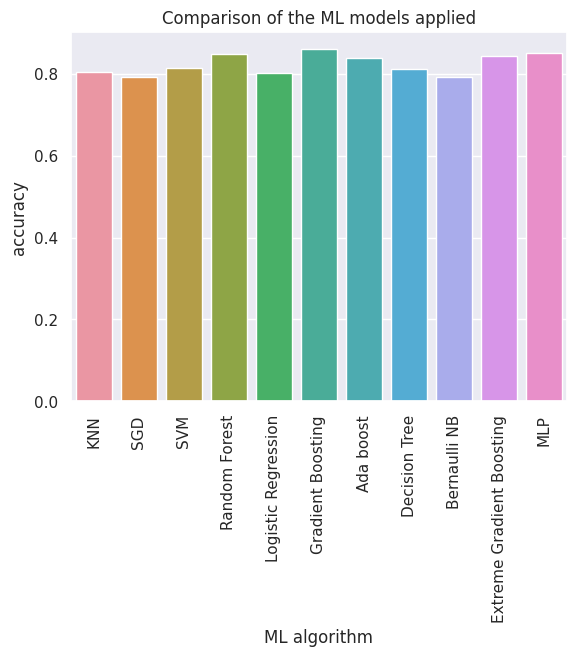

In [49]:
# Comparison of the models
sns.barplot(y = [KNN, SGDC, SVM, RFC, LR, GBC, ABC, DTC, BNB, XGB, ANN], x = ['KNN', 'SGD', 'SVM', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'Ada boost', 'Decision Tree', 'Bernaulli NB', 'Extreme Gradient Boosting', 'MLP'])
plt.xticks(rotation = 90)
plt.title("Comparison of the ML models applied")
plt.xlabel("ML algorithm")
plt.ylabel("accuracy");

In [54]:
accuracy = accuracy_score(y_test, model_5.predict(X_test))
precision = precision_score(y_test, model_5.predict(X_test))
recall = recall_score(y_test, model_5.predict(X_test))
f1_score = f1_score(y_test, model_5.predict(X_test))

<Axes: >

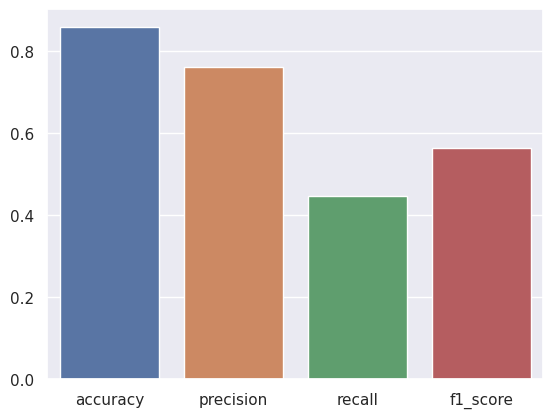

In [55]:
sns.barplot(y = [accuracy, precision, recall, f1_score], x = ['accuracy', 'precision', 'recall', 'f1_score'])